Lấy các thư viện cần dùng cho phân tích

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html
import plotly.graph_objects as go
from dash.dependencies import Input, Output

Lấy data từ file CSV



In [2]:

# Đọc dữ liệu từ tệp CSV
file_path = 'fdi_country_partners_en.csv'
data = pd.read_csv(file_path, encoding='utf-8')

data.head()

,Order,Country,Number of new projects,Newly registered capital (million USD),Adjusted project number,Adjusted capital (million USD),Number of times of capital contribution to buy shares,"Value of capital contribution, share purchase\n(million USD)",Year
0,1,Korea,702,2678.517,260,4048.4,NaN,NaN,2015
1,2,Malaysia,27,2447.488,15,30.8,NaN,NaN,2015
2,3,Japan,299,1284.983,157,556.7,NaN,NaN,2015
3,4,Taiwan,110,940.404,61,457.9,NaN,NaN,2015
4,5,Samoa,24,1314.037,8,80.6,NaN,NaN,2015


Xem các thành phần dữ liệu trong file CSV

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Order                                                        834 non-null    int64 
 1   Country                                                      834 non-null    object
 2   Number of new projects                                       684 non-null    object
 3   Newly registered capital (million USD)                       684 non-null    object
 4   Adjusted project number                                      538 non-null    object
 5   Adjusted capital (million USD)                               566 non-null    object
 6   Number of times of capital contribution to buy shares        720 non-null    object
 7   Value of capital contribution, share purchase
(million USD)  721 non-null    object
 8   Y

Bộ dữ liệu bao gồm có 834 dòng, 8 cột. Các cột bao gồm: 
    
Order: số thứ tự
    
Contry: tên quốc gia
    
Number of new projects: số dự án mới. Là một chỉ số dùng để đo lường số lượng dự án đầu tư trực tiếp nước ngoài (FDI) mới được bắt đầu trong một khu vực hoặc quốc gia cụ thể trong một khoảng thời gian nhất định.
    
Newly registered capital: số vốn đầu tư mới.  là tổng số vốn đầu tư mới được đăng ký bởi các nhà đầu tư nước ngoài để thực hiện các dự án FDI trong một quốc gia hoặc khu vực trong một khoảng thời gian nhất định.   
    
Adjusted project number: số dự án điều chỉnh. Là chỉ số dùng để đo lường độ chênh lệnh của số dự án đầu tư:
+ Nếu chỉ số này dương, cho thấy số dự án đầu tư trong năm đó tăng so với số dự án ban đầu. Tức là các nhà đầu tư hiện tại đã hoạt động và tiếp tục tin tưởng mở rộng quy mô bằng cách đăng ký thêm các dự án mới.        

+ Nếu chỉ số này âm, cho thấy số dự án đầu tư trong năm đó thấp hơn so với số dự án ban đầu. Tức là các nhà đầu tư hiện tại đã hoạt động và nhận thấy lợi nhuận không đạt như mức kỳ vọng hoặc thua lỗ thì sẽ thu hẹp quy mô hoặc chấm dứt hoạt động một số dự án.
    
Adjusted capital: số vốn đầu tư điều chỉnh. Là tổng số vốn đầu tư đã được điều chỉnh tăng hoặc giảm so với mức vốn đăng ký ban đầu của các dự án FDI hiện hữu:
+ Nếu chỉ số dương, tức là điều chỉnh vốn tăng. Cho thấy nhà đầu tư bổ sung vốn để mở rộng quy mô dự án, đầu tư thêm, các dự án ban đầu thành công, tăng trưởng tốt hoặc có tiềm năng phát triển thị trường.       

+ Nếu chỉ số âm, tức là điều chỉnh vốn giảm. Cho thấy nhà đầu tư thu hẹp quy mô dự án, rút một phần vốn hoặc tái cơ cấu do gặp khó khăn về tài chính, thay đổi chiến lược hoặc điều kiện thị trường bất lợi.
    
Number of times of capital contribution to buy shares: Số lần góp vốn để mua cổ phần. Là số lượng giao dịch hoặc lần thực hiện góp vốn, mua cổ phần của nhà đầu tư nước ngoài tại một quốc gia/khu vực trong một khoảng thời gian nhất định. Đây là hình thức đầu tư mà nhà đầu tư nước ngoài không bắt đầu dự án mới, mà đầu tư trực tiếp vào doanh nghiệp hiện hữu thông qua mua cổ phần hoặc góp vốn để tăng vốn điều lệ của doanh nghiệp. 

Value of capital contribution, share purchase: giá trị góp vốn, mua cổ phần. Là tổng số tiền mà nhà đầu tư nước ngoài chi ra góp vốn vào doanh nghiệp hoặc mua cổ phần từ các cổ đông khác trong doanh nghiệp đó.


Làm sạch dữ liệu

    + Điền các cột trống thành 0

In [4]:
df = pd.DataFrame(data)
df.replace(' -   ',pd.NA, inplace = True)
df.fillna(0, inplace=True)

    + Đổi một số tên riêng bị lỗi thành tên riêng bằng tiếng anh

In [5]:
df.rename(columns={'Value of capital contribution, share purchase\n(million USD)': 'Value of capital contribution, share purchase (million USD)'}, inplace=True)
country_mapping = {
    'Liên bang Nga': 'Russia',
    'Federal Republic of Russia':'Russia',
    "Côte d'Ivoire": "Cote deIvoire",
    "Cu Ba": "Cuba",
    "Nauy": "Norway"
}

# Loại bỏ khoảng trắng thừa và chuyển tên quốc gia thành chữ thường để tránh lỗi do cách viết khác nhau
df['Country'] = df['Country'].str.strip()  # Loại bỏ khoảng trắng thừa
df['Country'] = df['Country'].replace(country_mapping)

# Kiểm tra lại
print(df['Country'].unique())



['Korea' 'Malaysia' 'Japan' 'Taiwan' 'Samoa' 'United Kingdom' 'Singapore'
 'BritishVirginIslands' 'Hongkong' 'China' 'Turkey' 'Neitherland'
 'Seychelles' 'Thailand' 'Cayman Islands' 'The United States of America'
 'Australia' 'British West Indies' 'Brunei Darussalam' 'India'
 'Switzerland' 'France' 'Denmark' 'Germany' 'Sri Lanka' 'Luxembourg'
 'Indonesia' 'Israel' 'Italia' 'Russia' 'Angola' 'New Zealand'
 'Republic of Cyprus' 'Canada' 'Philippines' 'Marshall Islands' 'Belize'
 'Ireland' 'Burkina Faso' 'Spain' 'Laos' 'Belgium' 'Norway' 'Austria'
 'Macao' 'Island of Nevis' 'United Arab Emirates' 'Guatemala' 'Jordan'
 'Saudi Arabia' 'Ukraina' 'Mongolia' 'Sweden' 'Poland' 'Nepal'
 'Czech Republic' 'Hungary' 'Pakistan' 'Iran (Islamic Republic of)'
 'Slovenia' 'Venezuela' 'Bermuda' 'Kazakhstan' 'Belarus' 'Cambodia'
 'Mauritius' 'Panama' 'El Salvador' 'Portugal' 'Nigeria'
 'Saint Vincent and the Grenadines' 'Saudi Arabic' 'Liechtenstein' 'Egypt'
 'Swaziland' 'Armenia' 'Cape Verde' 'Bangladesh

Chuyển đổi các cột dữ liệu theo kiểu dữ liệu phù hợp:

+ các cột "Number of new projects", "Adjusted project number"," Number of times of capital contribution to buy shares" định dạng kiểu dữ liệu số nguyên (int) do biểu thị số lượng.
    
+ các cột "Newly registered capital", "Adjusted capital (million USD)", "Value of capital contribution, share purchase" định dạng kiểu dữ liệu số thực (float) do biểu thị giá trị.

In [6]:
# Đảm bảo cột là kiểu chuỗi trước khi sử dụng .str.replace
columns_to_convert = ['Newly registered capital (million USD)', 'Adjusted capital (million USD)', 
                      'Value of capital contribution, share purchase (million USD)']

for col in columns_to_convert:
    df[col] = (
        df[col].astype(str)  # Chuyển đổi thành kiểu chuỗi
        .str.replace('[()]', '', regex=True)  # Loại bỏ dấu ngoặc đơn
        .str.replace(',', '')  # Loại bỏ dấu phẩy
        .apply(lambda x: -float(x) if '(' in x else float(x))  # Chuyển thành số và xử lý dấu ngoặc đơn
    )

# Đảm bảo xử lý số lượng dự án đúng kiểu
df['Number of new projects'] = df['Number of new projects'].astype(float).astype(int)
df['Adjusted project number'] = df['Adjusted project number'].astype(float).astype(int)

# Đảm bảo xử lý số lần góp vốn đúng kiểu
df['Number of times of capital contribution to buy shares'] = (
    df['Number of times of capital contribution to buy shares']
    .astype(str)  # Chuyển thành chuỗi trước khi thay thế
    .str.replace('[, ]', '', regex=True)  # Loại bỏ dấu phẩy và dấu cách
    .apply(pd.to_numeric, errors='coerce')  # Chuyển thành số, chuyển lỗi thành NaN
    .fillna(0)  # Thay thế NaN bằng 0
    .astype(int)  # Chuyển sang kiểu int
)

# Kiểm tra lại thông tin của DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 9 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Order                                                        834 non-null    int64  
 1   Country                                                      834 non-null    object 
 2   Number of new projects                                       834 non-null    int32  
 3   Newly registered capital (million USD)                       834 non-null    float64
 4   Adjusted project number                                      834 non-null    int32  
 5   Adjusted capital (million USD)                               834 non-null    float64
 6   Number of times of capital contribution to buy shares        834 non-null    int32  
 7   Value of capital contribution, share purchase (million USD)  834 non-null    floa

Tạo thêm 3 cột: tổng số dự án, tổng số vốn đầu tư đã đăng ký và tổng số tiền đầu tư  

+ Tổng số dự án: là số dự án của quốc gia đó đăng ký trong 1 năm, gồm số dự án mới và số dự án điều chỉnh
+ Tổng vốn đầu tư: là số vốn mà quốc gia đăng ký cho các dự án mà quốc gia đó thực hiện, gồm vốn mới và vốn điều chỉnh.  
+ Tổng số tiền đầu tư: là số tiền mà quốc gia đó đã đầu tư vào khu vực trong 1 năm, gồm tổng vốn đầu tư và giá trị góp vốn, mua cổ phần.

In [7]:
# Tính tổng số dự án (số dự án mới + số dự án điều chỉnh)
df['Total number of projects'] = df['Number of new projects'] + df['Adjusted project number']

# Tính tổng vốn đầu tư (vốn đầu tư mới + vốn đầu tư điều chỉnh)
df['Total registered capital (million USD)'] = df['Newly registered capital (million USD)'] + df['Adjusted capital (million USD)']

# Tính tổng số tiền đầu tư (tổng vốn đầu tư + giá trị góp vốn, mua cổ phần)
df['Total investment (million USD)'] = df['Total registered capital (million USD)'] + df['Value of capital contribution, share purchase (million USD)']

Xuất ra file dữ liệu đã được chỉnh sửa để phân tích

In [8]:
# Xuất ra file CSV mới đã điều chỉnh
df.to_csv('fdi_country_partners_en(fixed).csv', index=False)

Lấy dữ liệu từ file CSV mới


In [9]:
# Đọc dữ liệu từ tệp CSV được tải lên
new_file_path = 'fdi_country_partners_en(fixed).csv'
new_data = pd.read_csv(new_file_path)

# Xem qua thông tin cơ bản của tập dữ liệu
new_data_info = {
    "head": new_data.head(),  # Xem 5 dòng đầu tiên
    "info": new_data.info(),  # Xem thông tin tổng quan
    "description": new_data.describe()  # Thống kê cơ bản
}

new_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Order                                                        834 non-null    int64  
 1   Country                                                      834 non-null    object 
 2   Number of new projects                                       834 non-null    int64  
 3   Newly registered capital (million USD)                       834 non-null    float64
 4   Adjusted project number                                      834 non-null    int64  
 5   Adjusted capital (million USD)                               834 non-null    float64
 6   Number of times of capital contribution to buy shares        834 non-null    int64  
 7   Value of capital contribution, share purchase (million USD)  834 non-null    flo

{'head':    Order   Country  Number of new projects  \
 0      1     Korea                     702   
 1      2  Malaysia                      27   
 2      3     Japan                     299   
 3      4    Taiwan                     110   
 4      5     Samoa                      24   
 
    Newly registered capital (million USD)  Adjusted project number  \
 0                                2678.517                      260   
 1                                2447.488                       15   
 2                                1284.983                      157   
 3                                 940.404                       61   
 4                                1314.037                        8   
 
    Adjusted capital (million USD)  \
 0                          4048.4   
 1                            30.8   
 2                           556.7   
 3                           457.9   
 4                            80.6   
 
    Number of times of capital contribution to buy

Phân tích

+ tính tổng số dự án mới, số vốn đầu tư mới qua các năm

In [10]:
# Tạo dữ liệu tổng hợp theo năm
new_df = pd.DataFrame(new_data)
trend_data = new_df.groupby('Year').agg({
    'Number of new projects': 'sum',
    'Newly registered capital (million USD)': 'sum'
}).reset_index()

+ tổng số dự án mới (2015-2022)

In [11]:
print(trend_data['Number of new projects'])

0    2013
1    2556
2    2591
3    3046
4    3883
5    2522
6    1738
7    2036
Name: Number of new projects, dtype: int64


+ Tạo biểu đồ xu hướng 

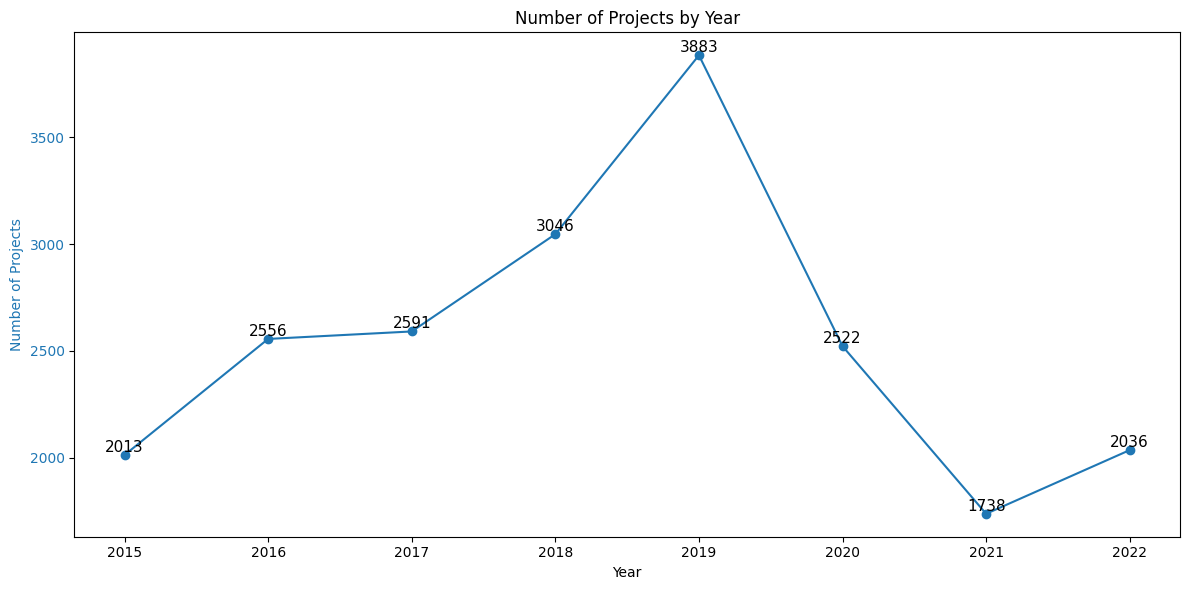

In [12]:
# Tạo biểu đồ số lượng dự án
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Projects', color='tab:blue')
ax1.plot(trend_data['Year'], trend_data['Number of new projects'], marker='o', color='tab:blue')

for i, value in enumerate(trend_data['Number of new projects']):
    ax1.text(trend_data['Year'][i], value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.title('Number of Projects by Year')
plt.tight_layout()
plt.show()


+ Tổng số vốn đầu tư mới

In [13]:
print(trend_data['Newly registered capital (million USD)'])

0    15577.603
1    15182.210
2    21275.925
3    17976.200
4    16745.660
5    14646.390
6    15245.416
7    12446.280
Name: Newly registered capital (million USD), dtype: float64


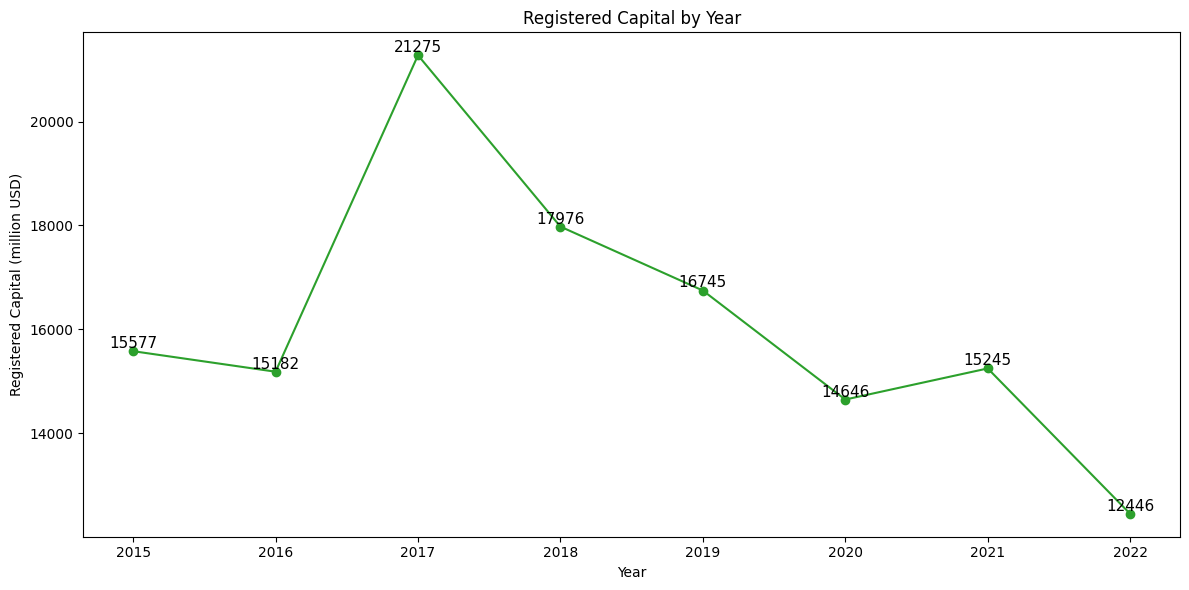

In [14]:
# Tạo biểu đồ tổng vốn đăng ký
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.set_xlabel('Year')
ax2.set_ylabel('Registered Capital (million USD)')
ax2.plot(trend_data['Year'], trend_data['Newly registered capital (million USD)'], marker='o', color='tab:green')

for i, value in enumerate(trend_data['Newly registered capital (million USD)']):
    ax2.text(trend_data['Year'][i], value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=11)

ax2.tick_params(axis='y')
plt.title('Registered Capital by Year')
plt.tight_layout()
plt.show()

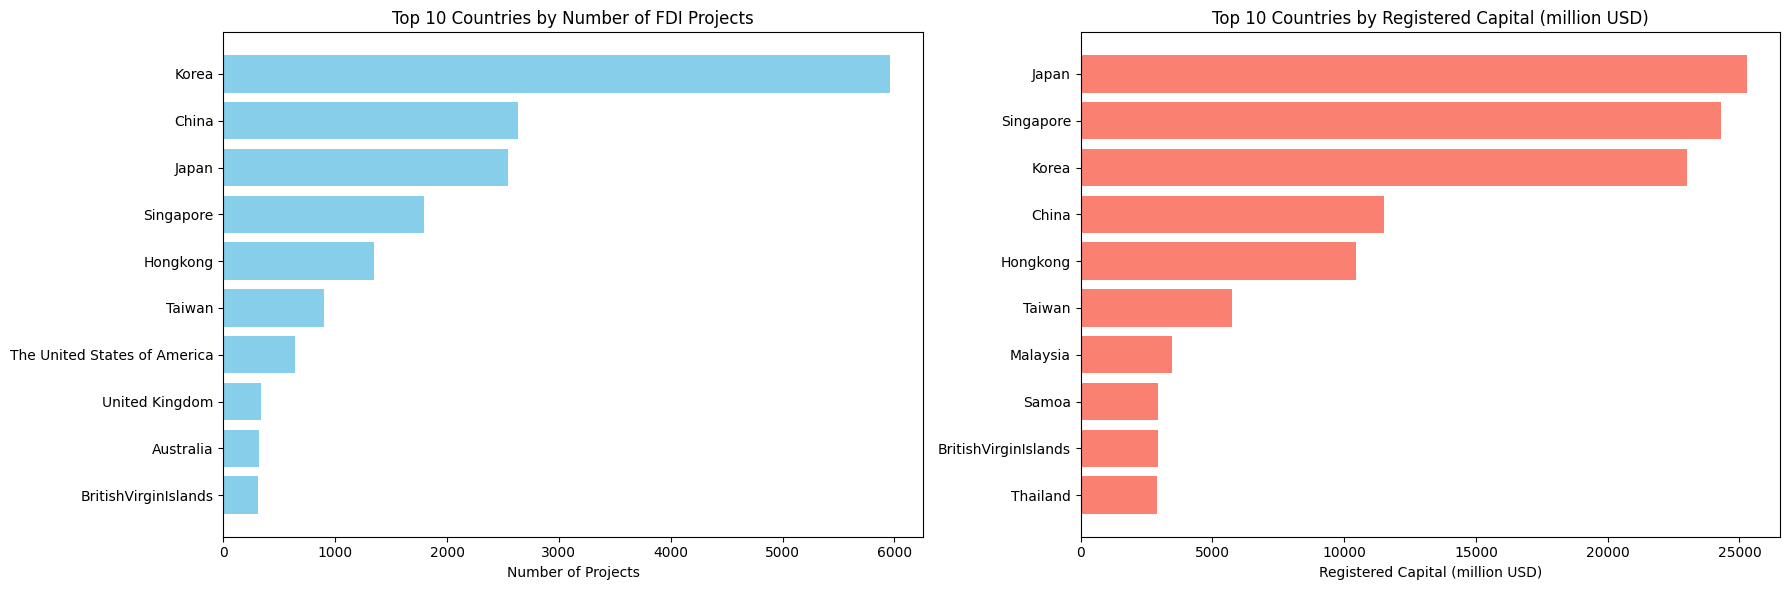

In [15]:
# Tính tổng số dự án và tổng vốn đăng ký theo quốc gia
country_fdi_data = new_df.groupby('Country').agg({
    'Number of new projects': 'sum',
    'Newly registered capital (million USD)': 'sum'
}).reset_index()

# Sắp xếp và chọn top 10 quốc gia có số dự án cao nhất
top_countries_projects = country_fdi_data.nlargest(10, 'Number of new projects')

# Sắp xếp và chọn top 10 quốc gia có vốn đăng ký cao nhất
top_countries_capital = country_fdi_data.nlargest(10, 'Newly registered capital (million USD)')

# Vẽ biểu đồ số dự án theo quốc gia
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ số lượng dự án
ax[0].barh(top_countries_projects['Country'], top_countries_projects['Number of new projects'], color='skyblue')
ax[0].set_title('Top 10 Countries by Number of FDI Projects')
ax[0].set_xlabel('Number of Projects')
ax[0].invert_yaxis()

# Biểu đồ vốn đăng ký
ax[1].barh(top_countries_capital['Country'], top_countries_capital['Newly registered capital (million USD)'], color='salmon')
ax[1].set_title('Top 10 Countries by Registered Capital (million USD)')
ax[1].set_xlabel('Registered Capital (million USD)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()




Biểu đồ tròn biểu diễn tỷ lệ cho số dự án mới (2015-2022), hiển thị 5 quốc gia có nhiều dự án mới nhất

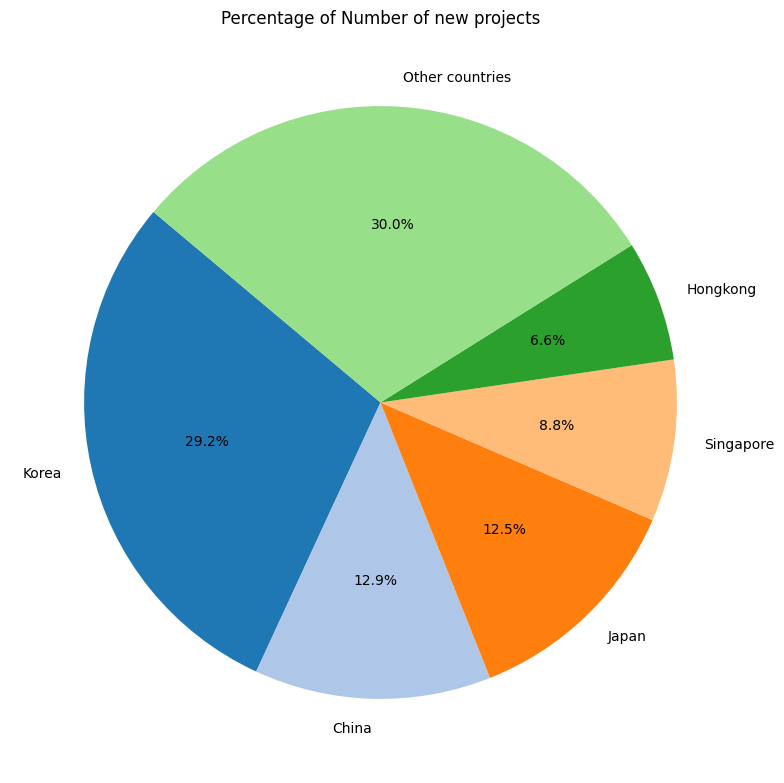

In [16]:
# Lấy dữ liệu số dự án mới theo quốc gia
new_project = new_df.groupby('Country')['Number of new projects'].sum().reset_index()

# Xác định các quốc gia có số dự án mới lớn nhất
top_countries = new_project.nlargest(5, 'Number of new projects')  # Lấy top 5 quốc gia
others = new_project[~new_project['Country'].isin(top_countries['Country'])]  # Các quốc gia còn lại

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Number of new projects'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other countries'], 'Number of new projects': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Number of new projects'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140,
    colors=plt.cm.tab20.colors  # Bảng màu
)
plt.title('Percentage of Number of new projects')
plt.tight_layout()
plt.show()


Biểu đồ tròn biểu diễn tỷ lệ cho vốn đăng ký mới, lấy 5 quốc gia có vốn đăng ký mới lớn nhất

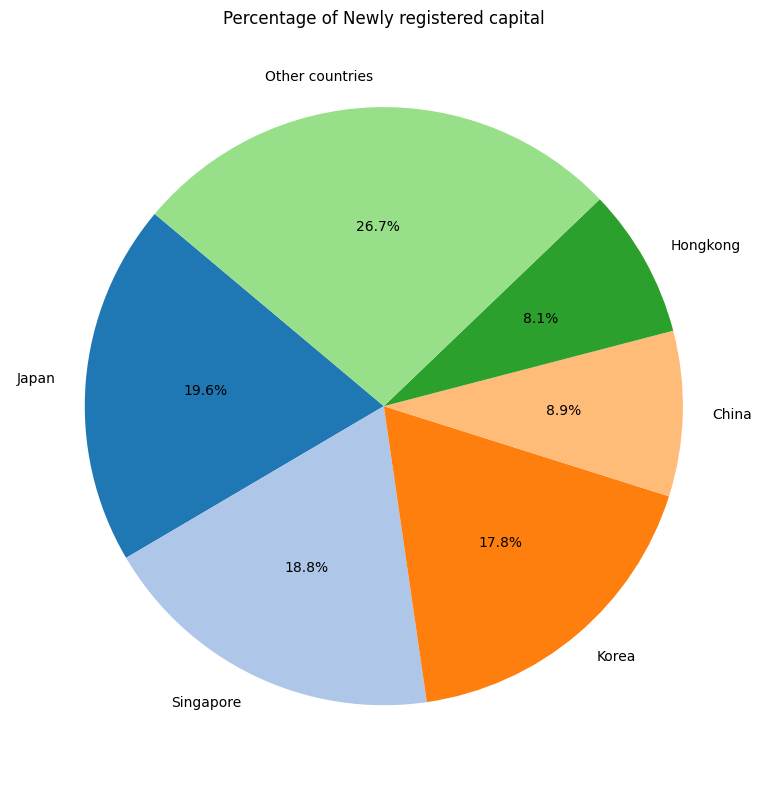

In [17]:
new_df['Newly registered capital (million USD)'] = new_df['Newly registered capital (million USD)'].fillna(0)

# Lấy dữ liệu vốn đăng ký mới theo quốc gia
new_capital = new_df.groupby('Country')['Newly registered capital (million USD)'].sum().reset_index()

# Xác định các quốc gia có vốn đăng ký mới lớn nhất
top_countries = new_capital.nlargest(5, 'Newly registered capital (million USD)')
others = new_capital[~new_capital['Country'].isin(top_countries['Country'])]

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Newly registered capital (million USD)'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other countries'], 'Newly registered capital (million USD)': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Newly registered capital (million USD)'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Percentage of Newly registered capital')
plt.tight_layout()
plt.show()



Tính tổng số dự án và tổng số tiền đầu tư theo năm

In [18]:
year_data = new_df.groupby('Year').agg({
    'Total number of projects': 'sum',
    'Total registered capital (million USD)': 'sum',
    'Value of capital contribution, share purchase (million USD)': 'sum',
    'Total investment (million USD)': 'sum'
}).reset_index()

+ Tổng số dự án qua các năm 2015-2022


In [19]:
print(year_data['Total number of projects'])


0    2827
1    3781
2    3779
3    4215
4    5264
5    3662
6    2723
7    3143
Name: Total number of projects, dtype: int64


+ Biều đồ xu hướng cho tổng số dự án qua các năm

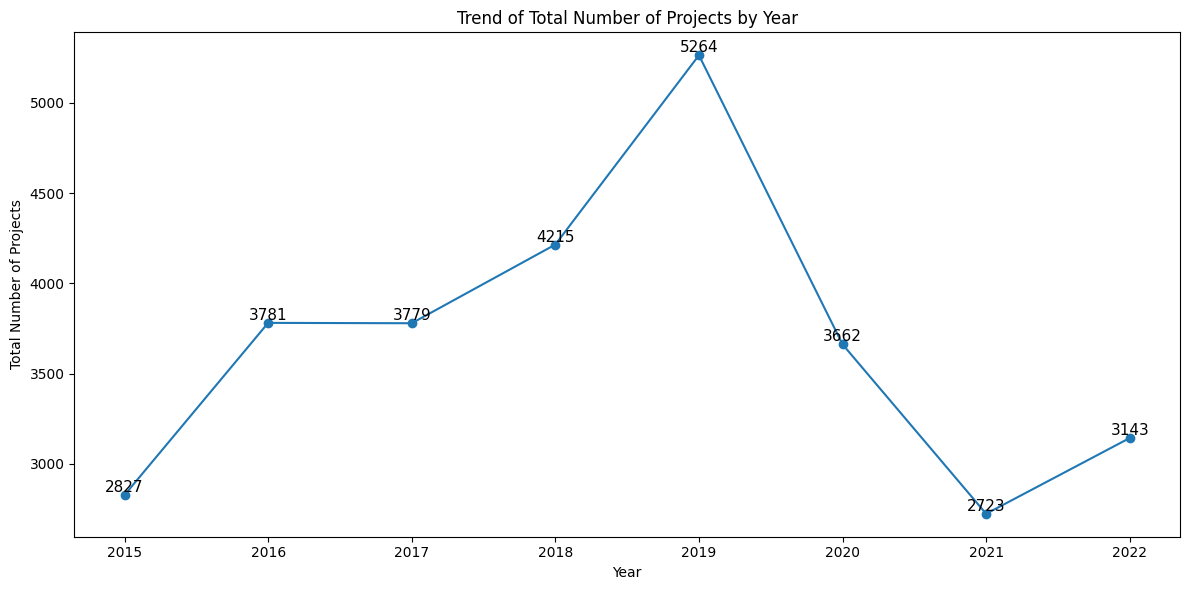

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Number of Projects')
ax1.plot(year_data['Year'], year_data['Total number of projects'], marker='o', color='tab:blue')

# Thêm số liệu tại mỗi điểm trên biểu đồ số dự án
for i, value in enumerate(year_data['Total number of projects']):
    ax1.text(year_data['Year'][i], value + 0.1, str(value), ha='center', va='bottom', fontsize=11)

ax1.tick_params(axis='y')
plt.title('Trend of Total Number of Projects by Year')
plt.tight_layout()
plt.show()

Tổng vốn đăng ký qua các năm 2015-2022


In [21]:
print(year_data['Total registered capital (million USD)'])

0    22757.303
1    20947.320
2    29790.115
3    26211.310
4    22547.700
5    21060.980
6    24293.646
7    22720.710
Name: Total registered capital (million USD), dtype: float64


Biều đồ biểu diễn tổng vốn đăng ký (2015-2022)


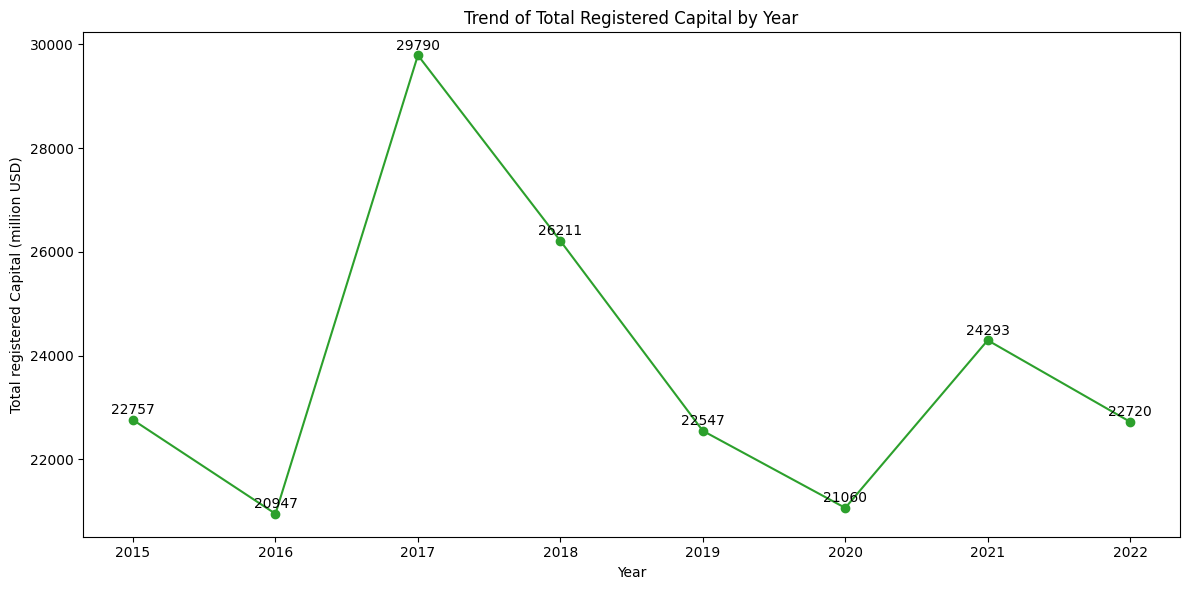

In [22]:
# Biểu đồ xu hướng tổng vốn đăng ký
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.set_xlabel('Year')
ax2.set_ylabel('Total registered Capital (million USD)')
ax2.plot(year_data['Year'], year_data['Total registered capital (million USD)'], marker='o', color='tab:green')

# Thêm số liệu tại mỗi điểm trên biểu đồ tổng vốn đăng ký
for i, value in enumerate(year_data['Total registered capital (million USD)']):
    ax2.text(year_data['Year'][i], value + 50, str(int(value)), ha='center', va='bottom', fontsize=10)

ax2.tick_params(axis='y')
plt.title('Trend of Total Registered Capital by Year')
plt.tight_layout()
plt.show()

Giá trị góp vốn, mua cổ phần (2015-2022)

In [23]:
print(year_data['Value of capital contribution, share purchase (million USD)'])

0        0.00000
1     3425.34000
2     5909.12000
3     9892.78000
4    15471.49500
5     7469.20003
6     6893.17700
7     5154.10800
Name: Value of capital contribution, share purchase (million USD), dtype: float64


Biểu đồ thể hiện giá trị góp vốn, mua cổ phần

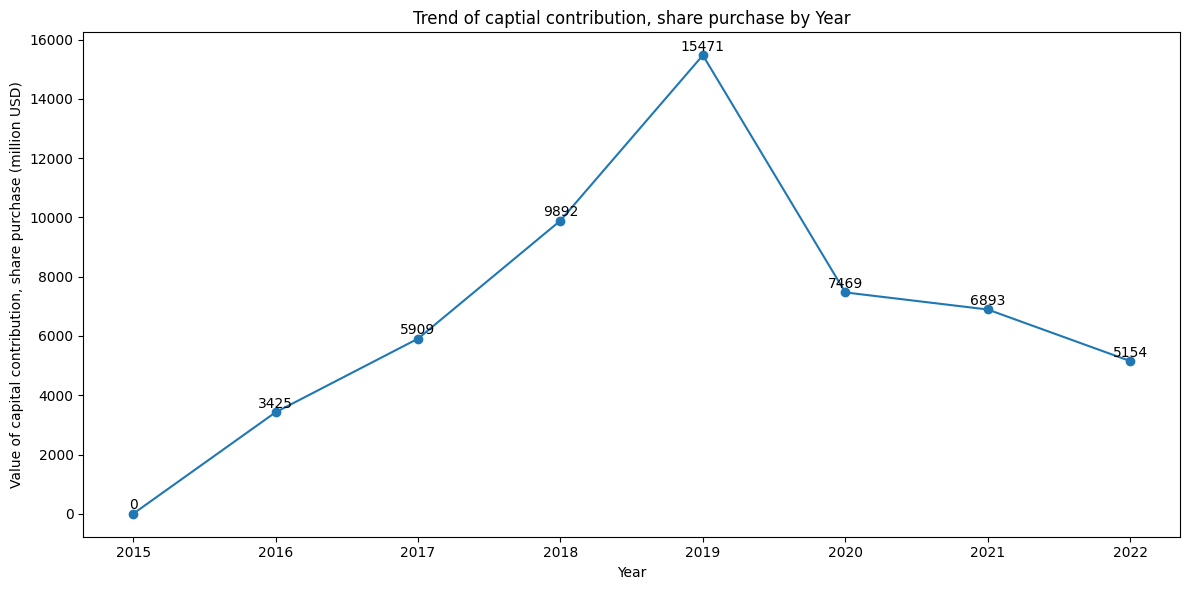

In [24]:
# Biểu đồ xu hướng tổng vốn đầu tư
year_data['Value of capital contribution, share purchase (million USD)'] = year_data['Value of capital contribution, share purchase (million USD)'].astype(int)
fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.set_xlabel('Year')
ax3.set_ylabel('Value of capital contribution, share purchase (million USD)')
ax3.plot(year_data['Year'], year_data['Value of capital contribution, share purchase (million USD)'], marker='o', color='tab:blue')

# Thêm số liệu tại mỗi điểm trên biểu đồ tổng vốn đầu tư
for i, value in enumerate(year_data['Value of capital contribution, share purchase (million USD)']):
    ax3.text(year_data['Year'][i], value + 50, str(int(value)), ha='center', va='bottom', fontsize=10)

ax3.tick_params(axis='y')
plt.title('Trend of captial contribution, share purchase by Year')
plt.tight_layout()
plt.show()

Tổng số tiền đầu tư (2015-2022)

In [25]:
year_data['Total investment (million USD)'] = year_data['Total investment (million USD)'].astype(int)
print(f'{year_data['Total investment (million USD)']}')

0    22757
1    24372
2    35699
3    36104
4    38019
5    28530
6    31186
7    27874
Name: Total investment (million USD), dtype: int32


Biểu đồ xu hướng tổng số tiền đầu tư

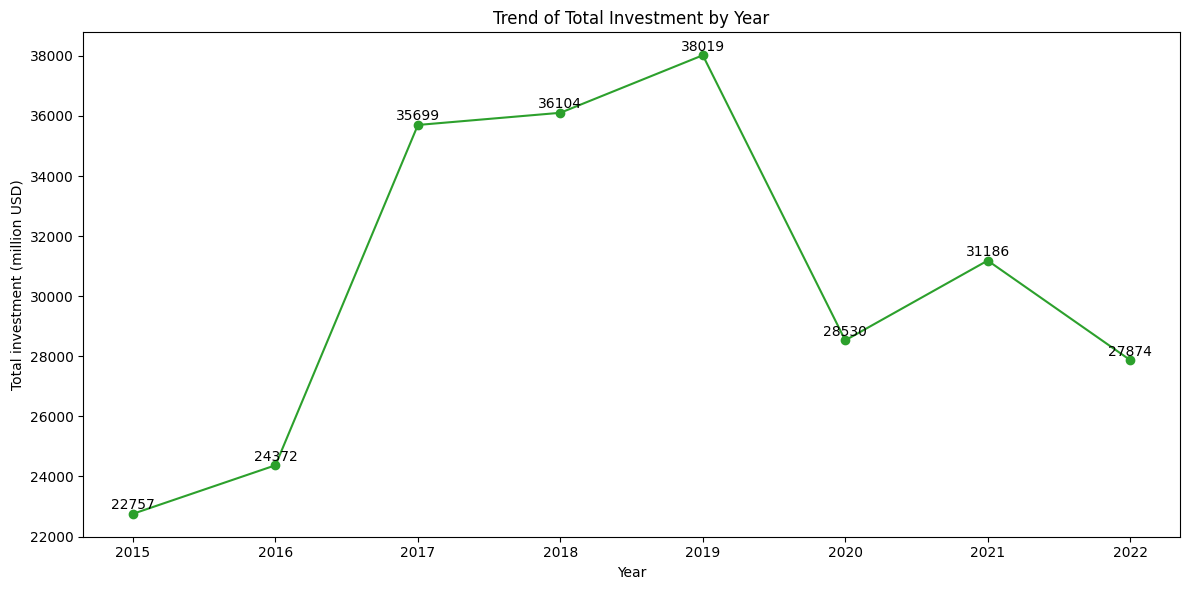

In [26]:
# Biểu đồ xu hướng tổng vốn đầu tư
year_data['Total investment (million USD)'] = year_data['Total investment (million USD)'].astype(int)
fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.set_xlabel('Year')
ax3.set_ylabel('Total investment (million USD)')
ax3.plot(year_data['Year'], year_data['Total investment (million USD)'], marker='o', color='tab:green')

# Thêm số liệu tại mỗi điểm trên biểu đồ tổng vốn đầu tư
for i, value in enumerate(year_data['Total investment (million USD)']):
    ax3.text(year_data['Year'][i], value + 50, str(int(value)), ha='center', va='bottom', fontsize=10)

ax3.tick_params(axis='y')
plt.title('Trend of Total Investment by Year')
plt.tight_layout()
plt.show()

Tính tổng dự án, tổng vốn đăng ký, giá trị cổ phần, tổng tiền đầu tư theo quốc gia

In [27]:
# Tính tổng số dự án và tổng vốn cho mỗi quốc gia
country_data = new_df.groupby('Country').agg({
    'Total number of projects': 'sum',
    'Total registered capital (million USD)': 'sum',
    'Value of capital contribution, share purchase (million USD)': 'sum',
    'Total investment (million USD)': 'sum'
}).reset_index()

# Làm tròn tổng số dự án và tổng vốn  thành số nguyên
country_data['Total number of projects'] = country_data['Total number of projects'].round(0).astype(int)
country_data['Total registered capital (million USD)'] = country_data['Total registered capital (million USD)'].round(0).astype(int)
country_data['Total investment (million USD)'] = country_data['Total investment (million USD)'].round(0).astype(int)

Biều đồ thể hiện 10 quốc gia thực hiện nhiều dự án nhất

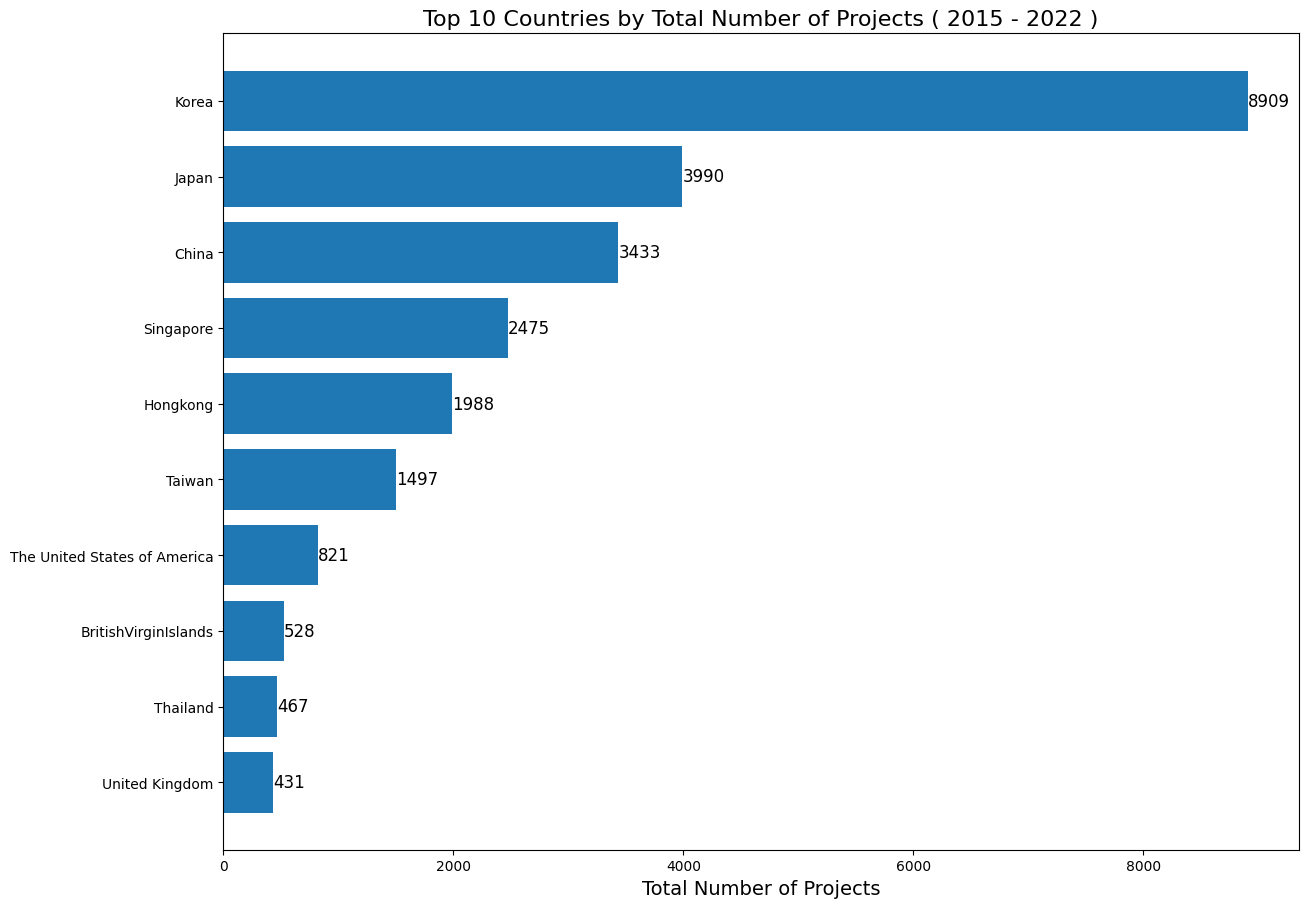

In [28]:
# Sắp xếp theo tổng số dự án và chọn top 10 quốc gia
top_10_projects = country_data.sort_values(by='Total number of projects', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia theo tổng số dự án (giảm dần)
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.barh(
    top_10_projects['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_projects['Total number of projects'][::-1],
    color='tab:blue'
)
ax1.set_xlabel('Total Number of Projects', fontsize=14)
ax1.set_title('Top 10 Countries by Total Number of Projects ( 2015 - 2022 )', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_projects['Total number of projects'][::-1]):
    ax1.text(value + 0.5, i, str(value), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ tròn biều diễn theo tỷ lệ của tổng dự án, lấy 5 quốc gia lớn nhất

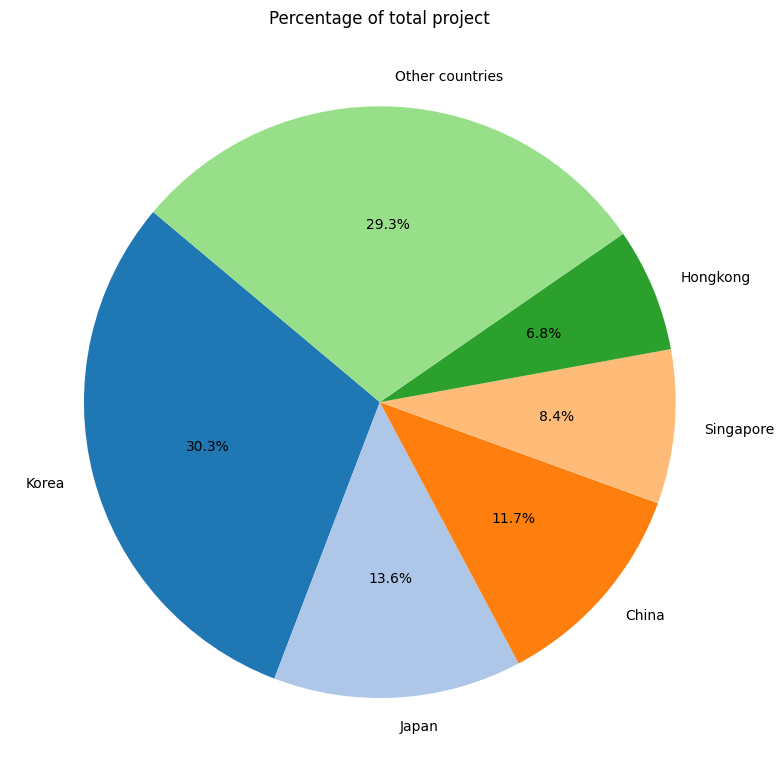

In [29]:
# Lấy dữ liệu tổng số dự án theo quốc gia
project_data = new_df.groupby('Country')['Total number of projects'].sum().reset_index()

# Xác định các quốc gia có số dự án lớn nhất
top_countries = project_data.nlargest(5, 'Total number of projects')  # Lấy top 5 quốc gia
others = project_data[~project_data['Country'].isin(top_countries['Country'])]  # Các quốc gia còn lại

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Total number of projects'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other countries'], 'Total number of projects': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Total number of projects'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140,
    colors=plt.cm.tab20.colors  # Bảng màu
)
plt.title('Percentage of total project')
plt.tight_layout()
plt.show()



Biểu đồ 10 quốc gia có tổng vốn đăng ký nhiều nhất

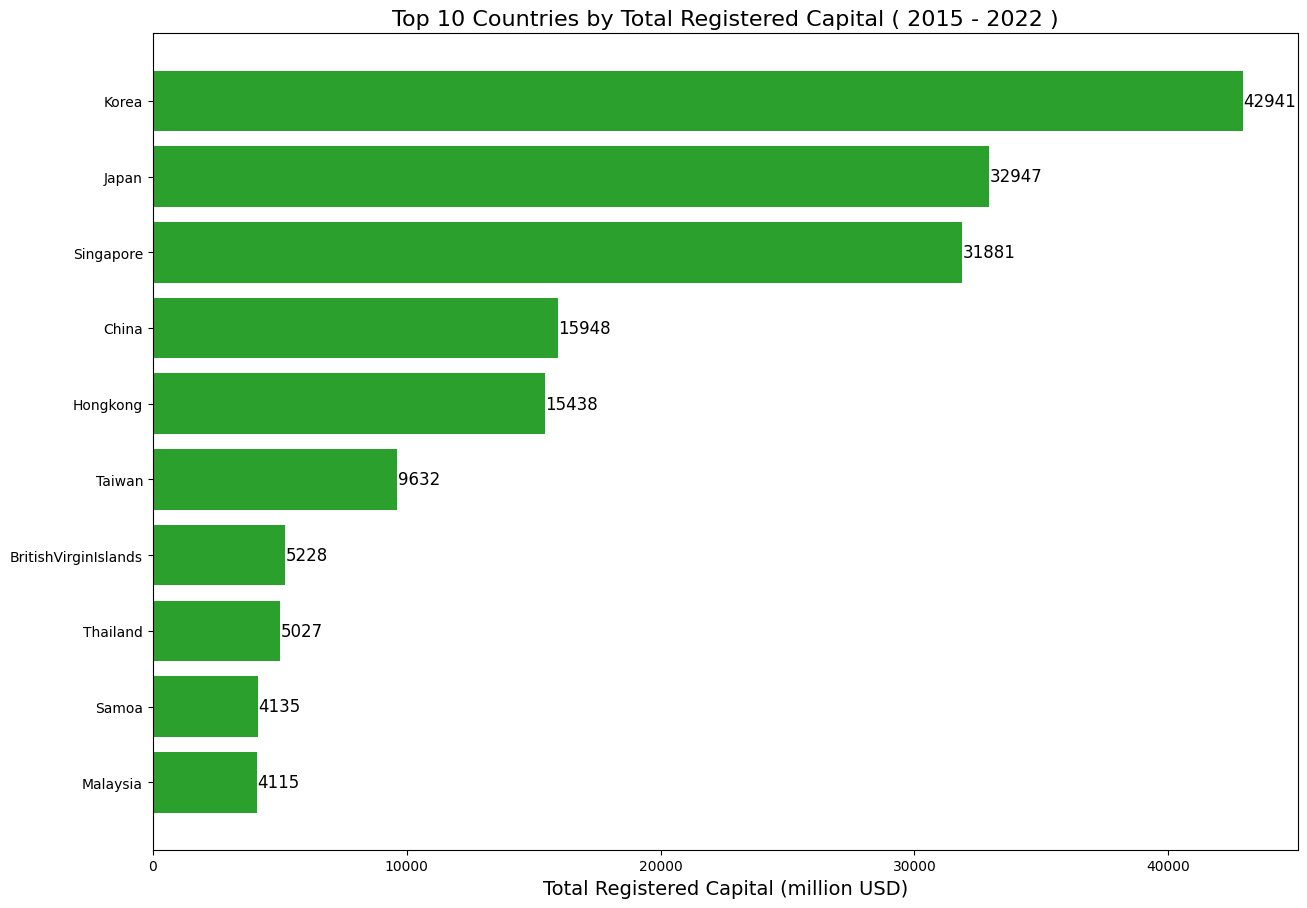

In [30]:
# Sắp xếp theo tổng vốn đăng ký và chọn top 10 quốc gia
top_10_registered = country_data.sort_values(by='Total registered capital (million USD)', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia theo tổng vốn đăng ký (giảm dần)
fig, ax2 = plt.subplots(figsize=(14, 10))
ax2.barh(
    top_10_registered['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_registered['Total registered capital (million USD)'][::-1],
    color='tab:green'
)
ax2.set_xlabel('Total Registered Capital (million USD)', fontsize=14)
ax2.set_title('Top 10 Countries by Total Registered Capital ( 2015 - 2022 )', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_registered['Total registered capital (million USD)'][::-1]):
    ax2.text(value + 10, i, str(value), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ tròn biểu diễn tỷ lệ, lấy 5 quốc gia lớn nhất

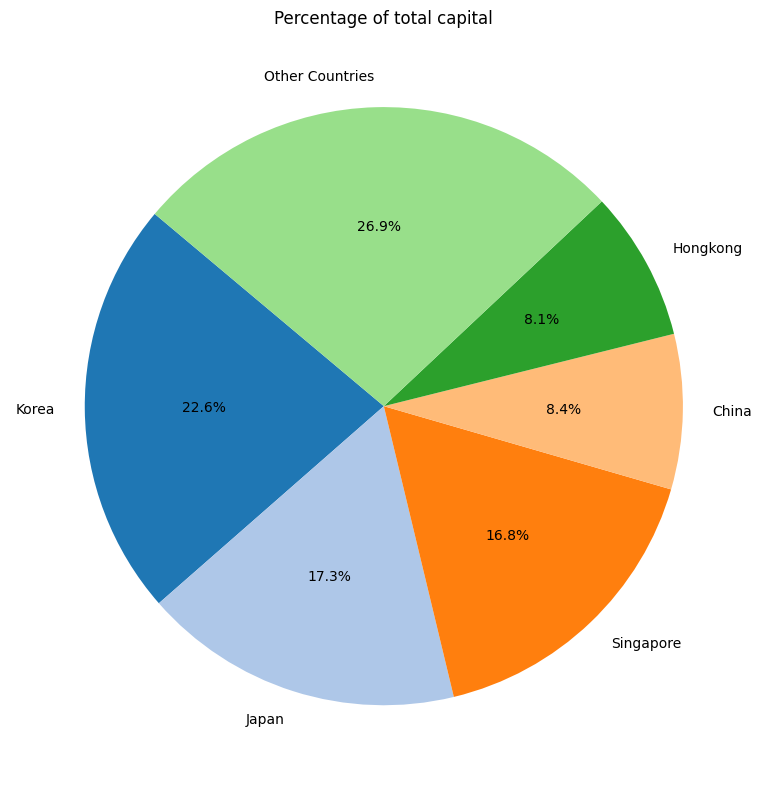

In [31]:
# Lấy dữ liệu tổng vốn đầu tư theo quốc gia
registered_data = new_df.groupby('Country')['Total registered capital (million USD)'].sum().reset_index()

# Xác định các quốc gia có vốn đầu tư lớn nhất
top_countries = registered_data.nlargest(5, 'Total registered capital (million USD)')  # Lấy top 5 quốc gia
others = registered_data[~registered_data['Country'].isin(top_countries['Country'])]  # Các quốc gia còn lại

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Total registered capital (million USD)'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other Countries'], 'Total registered capital (million USD)': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Total registered capital (million USD)'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140,
    colors=plt.cm.tab20.colors  # Bảng màu
)
plt.title('Percentage of total capital')
plt.tight_layout()
plt.show()


Biểu đồ biểu diễn 10 quốc gia có giá trị góp vốn, mua cổ phần lớn nhất

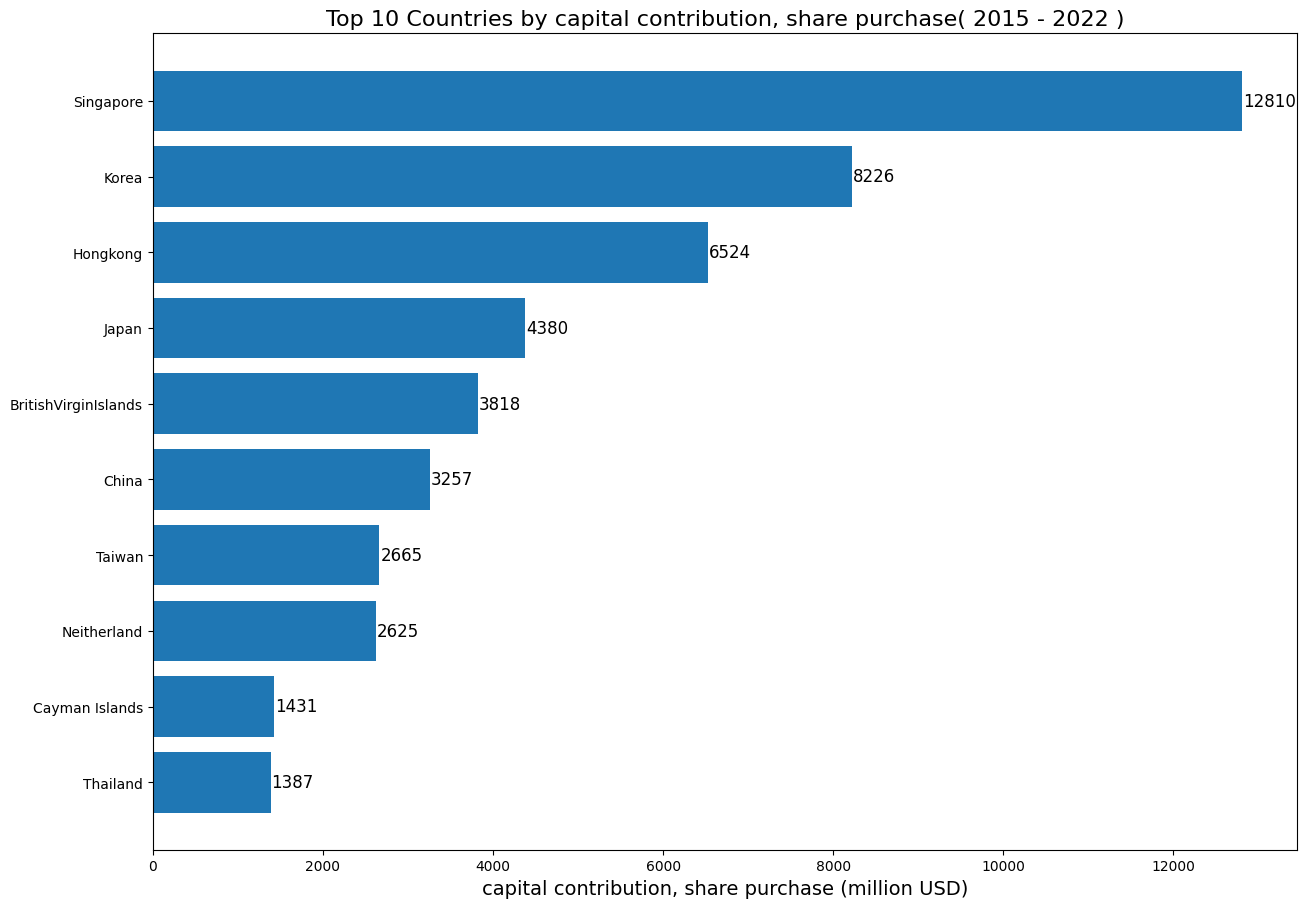

In [32]:
top_10_contribution = country_data.sort_values(by='Value of capital contribution, share purchase (million USD)', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia có giá trị góp vốn, mua cổ phần (giảm dần)
fig, ax2 = plt.subplots(figsize=(14, 10))
ax2.barh(
    top_10_contribution['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_contribution['Value of capital contribution, share purchase (million USD)'][::-1],
    color='tab:blue'
)
ax2.set_xlabel('capital contribution, share purchase (million USD)', fontsize=14)
ax2.set_title('Top 10 Countries by capital contribution, share purchase( 2015 - 2022 )', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_contribution['Value of capital contribution, share purchase (million USD)'][::-1]):
    ax2.text(value + 10, i, str(int(value)), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ tròn biểu diễn theo tỷ lệ, lấy 5 quốc gia lớn nhất

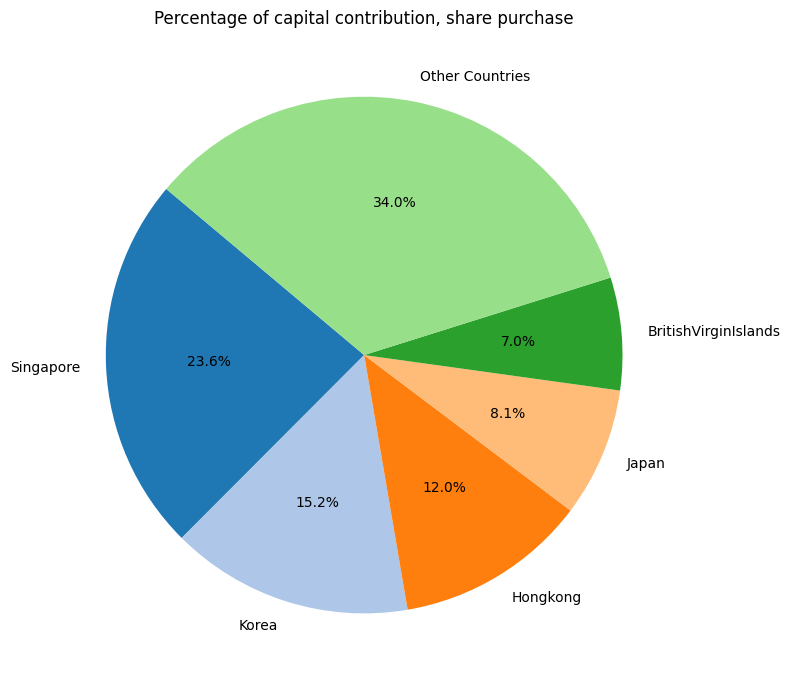

In [33]:
# Lấy dữ liệu tổng số tiền đầu tư theo quốc gia
contribution_data = new_df.groupby('Country')['Value of capital contribution, share purchase (million USD)'].sum().reset_index()

# Xác định các quốc gia có giá trị góp vốn, mua cổ phần lớn nhất
top_countries = contribution_data.nlargest(5, 'Value of capital contribution, share purchase (million USD)')  # Lấy top 5 quốc gia
others = contribution_data[~contribution_data['Country'].isin(top_countries['Country'])]  # Các quốc gia còn lại

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Value of capital contribution, share purchase (million USD)'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other Countries'], 'Value of capital contribution, share purchase (million USD)': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Value of capital contribution, share purchase (million USD)'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140,
    colors=plt.cm.tab20.colors  # Bảng màu
)
plt.title('Percentage of capital contribution, share purchase')
plt.tight_layout()
plt.show()

Biều đồ biểu diễn 10 quốc gia có tổng số tiền đầu tư nhiều nhất

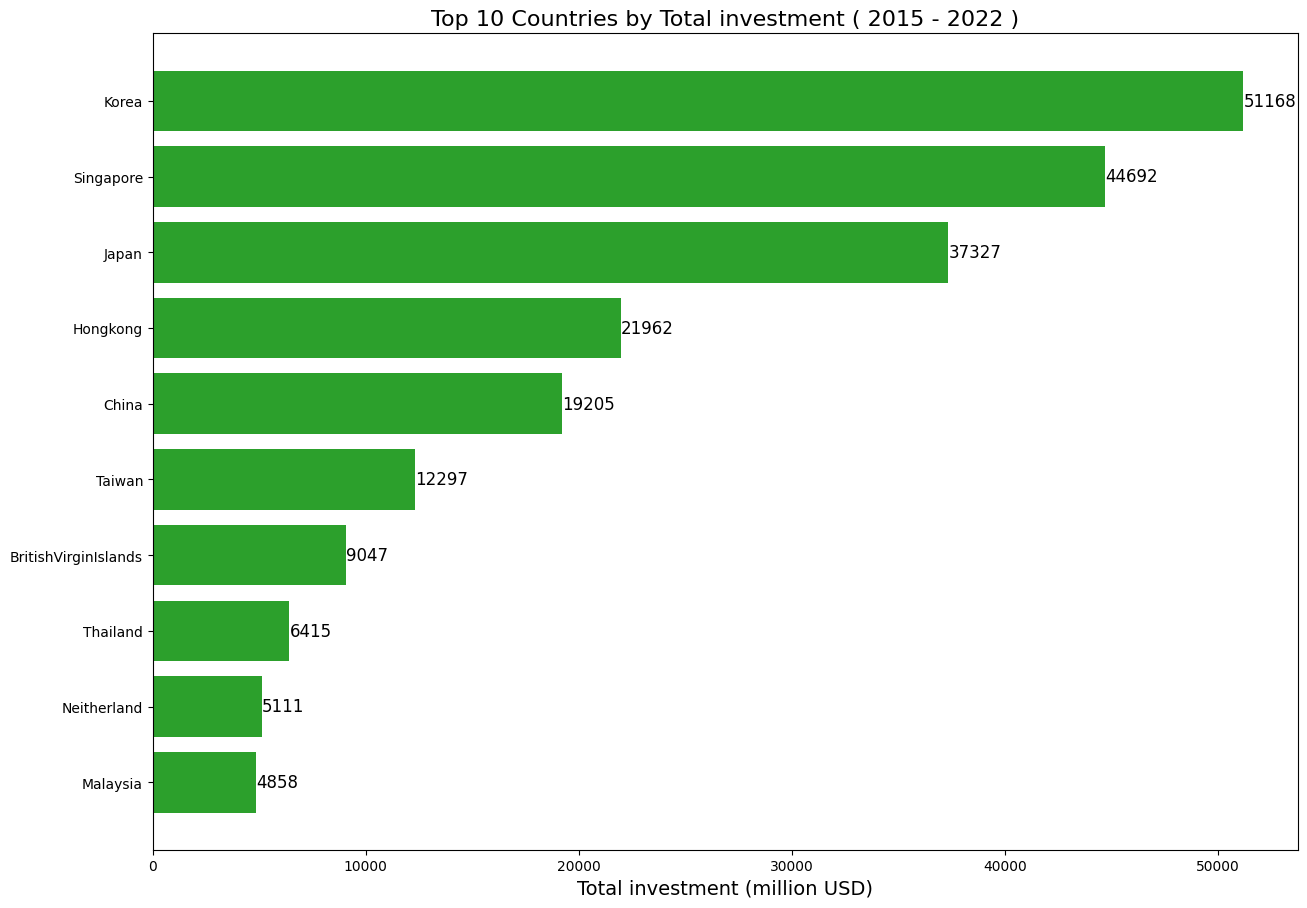

In [34]:
top_10_investment = country_data.sort_values(by='Total investment (million USD)', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia theo tổng vốn đăng ký (giảm dần)
fig, ax2 = plt.subplots(figsize=(14, 10))
ax2.barh(
    top_10_investment['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_investment['Total investment (million USD)'][::-1],
    color='tab:green'
)
ax2.set_xlabel('Total investment (million USD)', fontsize=14)
ax2.set_title('Top 10 Countries by Total investment ( 2015 - 2022 )', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_investment['Total investment (million USD)'][::-1]):
    ax2.text(value + 10, i, str(int(value)), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ tròn biểu diễn theo tỷ lệ, lấy 5 quốc gia lớn nhất

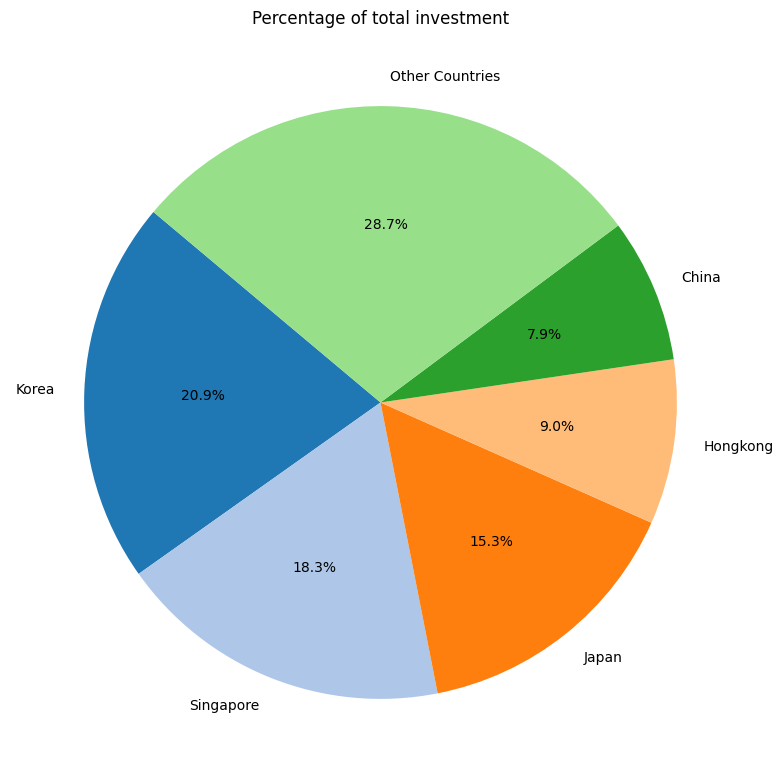

In [35]:
# Lấy dữ liệu tổng số tiền đầu tư theo quốc gia
investment_data = new_df.groupby('Country')['Total investment (million USD)'].sum().reset_index()

# Xác định các quốc gia có tổng số vốn đầu tư lớn nhất
top_countries = investment_data.nlargest(5, 'Total investment (million USD)')  # Lấy top 5 quốc gia
others = investment_data[~investment_data['Country'].isin(top_countries['Country'])]  # Các quốc gia còn lại

# Gộp dữ liệu của các quốc gia còn lại
others_sum = others['Total investment (million USD)'].sum()

# Thêm hàng "Các quốc gia khác" vào top_countries
others_row = pd.DataFrame({'Country': ['Other Countries'], 'Total investment (million USD)': [others_sum]})
top_countries = pd.concat([top_countries, others_row], ignore_index=True)

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    top_countries['Total investment (million USD)'],
    labels=top_countries['Country'],
    autopct='%1.1f%%',  # Hiển thị tỷ lệ phần trăm
    startangle=140,
    colors=plt.cm.tab20.colors  # Bảng màu
)
plt.title('Percentage of total investment')
plt.tight_layout()
plt.show()


Lấy dữ liệu cho năm 2022, bao gồm tổng số dự án và tổng số tiền đầu tư

In [36]:
# Lọc dữ liệu chỉ cho năm 2022
data_2022 = new_df[new_df['Year'] == 2022]

# Tính tổng số dự án và tổng tiền đầu tư cho mỗi quốc gia trong năm 2022
country_data_2022 = data_2022.groupby('Country').agg({
    'Total number of projects': 'sum',
    'Total registered capital (million USD)': 'sum',
    'Total investment (million USD)': 'sum'
}).reset_index()

# Làm tròn giá trị thành số nguyên
country_data_2022['Total number of projects'] = country_data_2022['Total number of projects'].round(0).astype(int)
country_data_2022['Total registered capital (million USD)'] = country_data_2022['Total registered capital (million USD)'].round(0).astype(int)
country_data_2022['Total investment (million USD)'] = country_data_2022['Total investment (million USD)'].round(0).astype(int)


Biểu đồ cho tổng số dự án năm 2022, lấy 10 quốc gia có số dự án nhiều nhất

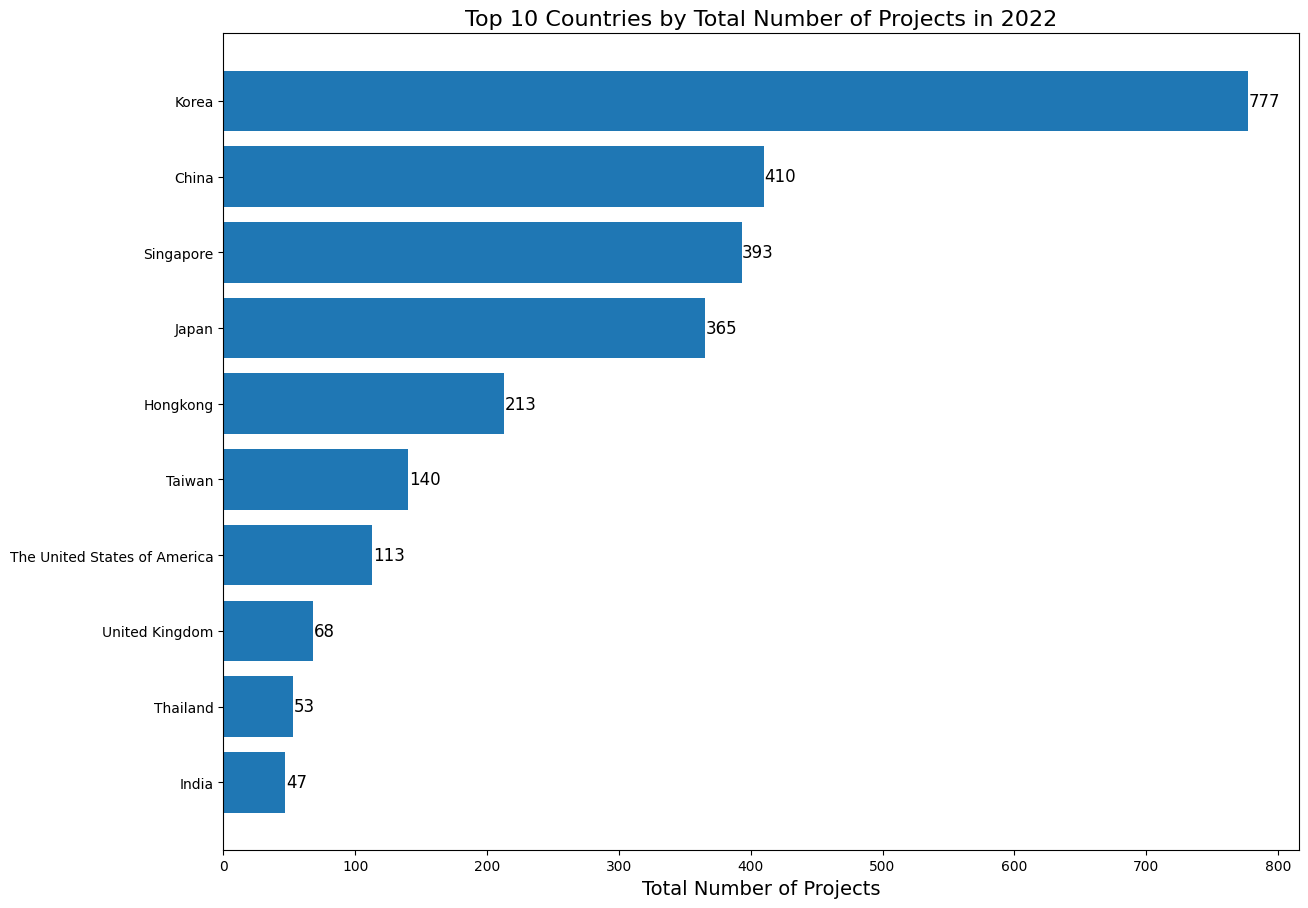

In [37]:
# Sắp xếp theo tổng số dự án và chọn top 10 quốc gia
top_10_projects_2022 = country_data_2022.sort_values(by='Total number of projects', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia theo tổng số dự án (giảm dần)
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.barh(
    top_10_projects_2022['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_projects_2022['Total number of projects'][::-1],
    color='tab:blue'
)
ax1.set_xlabel('Total Number of Projects', fontsize=14)
ax1.set_title('Top 10 Countries by Total Number of Projects in 2022', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_projects_2022['Total number of projects'][::-1]):
    ax1.text(value + 0.5, i, str(value), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ cho tổng vốn đăng ký năm 2022, lấy 10 quốc gia có vốn đăng ký nhiều nhất

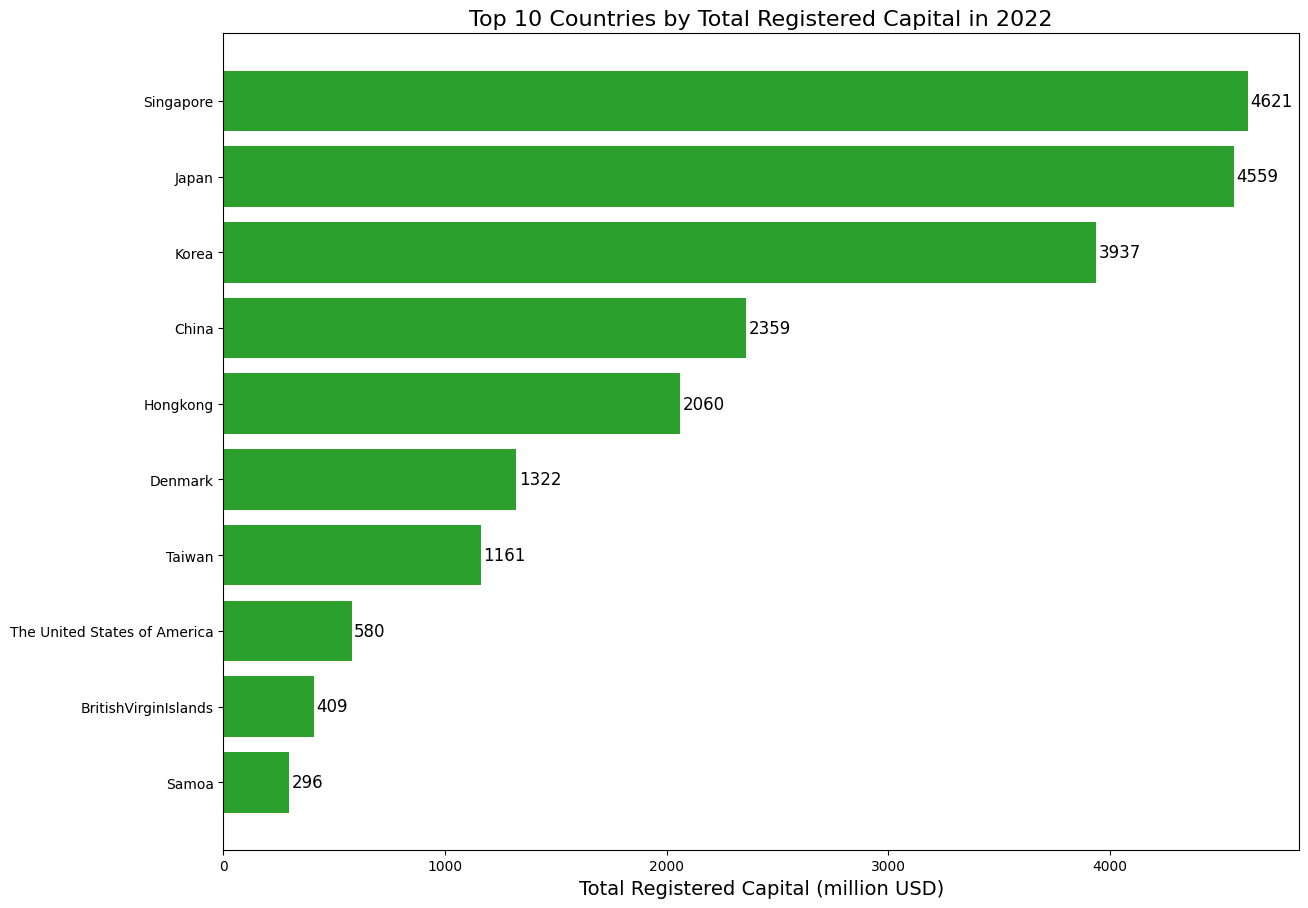

In [38]:
# Sắp xếp theo tổng vốn đăng ký, chọn 10 quốc gia nhiều nhất
top_10_registered_2022 = country_data_2022.sort_values(by='Total registered capital (million USD)', ascending=False).head(10)

# Vẽ biểu đồ cột ngang cho top 10 quốc gia theo tổng tiền đầu tư (giảm dần)
fig, ax2 = plt.subplots(figsize=(14, 10))
ax2.barh(
    top_10_registered_2022 ['Country'][::-1],  # Đảo ngược thứ tự để hiển thị giảm dần
    top_10_registered_2022 ['Total registered capital (million USD)'][::-1],
    color='tab:green'
)
ax2.set_xlabel('Total Registered Capital (million USD)', fontsize=14)
ax2.set_title('Top 10 Countries by Total Registered Capital in 2022', fontsize=16)

# Thêm giá trị lên trên cột
for i, value in enumerate(top_10_registered_2022 ['Total registered capital (million USD)'][::-1]):
    ax2.text(value + 10, i, str(value), va='center', fontsize=12)

plt.tight_layout(pad=4.0)
plt.show()

Biểu đồ bản đồ

In [39]:
new_df['Total number of projects'] = new_df['Total number of projects'].astype(int)
new_df['Total registered capital (million USD)'] = new_df['Total registered capital (million USD)'].astype(float)
new_df['Value of capital contribution, share purchase (million USD)'] = new_df['Value of capital contribution, share purchase (million USD)'].astype(float)
new_df['Total investment (million USD)'] = new_df['Total investment (million USD)'].astype(float)

# Xác định phạm vi màu cố định trên tất cả các năm
zmin = new_df['Total investment (million USD)'].min()
zmax = new_df['Total investment (million USD)'].max()

app = dash.Dash(__name__)

# Dropdown năm
year_dropdown = dcc.Dropdown(
    id='year-dropdown',
    options=[{'label': str(year), 'value': year} for year in new_df['Year'].unique()],
    value=2022,  # Mặc định chọn năm 2022
    style={'width': '50%'}
)

# Bản đồ 3D
map_graph = dcc.Graph(id='map-graph')

# Mô tả thông tin khi click vào quốc gia
country_info = html.Div(id='country-info', style={'padding': '10px'})

# Giao diện người dùng
app.layout = html.Div([
    year_dropdown,
    map_graph,
    country_info  # Thêm phần hiển thị thông tin
])

# Cập nhật bản đồ theo năm chọn
@app.callback(
    Output('map-graph', 'figure'),
    Output('country-info', 'children'),
    [Input('year-dropdown', 'value'),
     Input('map-graph', 'clickData')]
)
def update_map(year, click_data):
    # Lọc dữ liệu theo năm
    year_data = new_df[new_df['Year'] == year]
    
    # Tính tổng số dự án, tổng vốn đăng ký, giá trị mua cổ phần và tổng số tiền đầu tư
    country_data_year = year_data.groupby('Country').agg({
        'Total number of projects': 'sum',
        'Total registered capital (million USD)': 'sum',
        'Value of capital contribution, share purchase (million USD)': 'sum',
        'Total investment (million USD)': 'sum'
    }).reset_index()


    # Định nghĩa các giá trị chia (bins)    
    bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]  # Tùy chỉnh thêm nếu cần
    ticktext = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]  # Nhãn hiển thị cho các khoảng

    fig = go.Figure(data=go.Choropleth(
        locations=country_data_year['Country'],
        locationmode='country names',
        z=country_data_year['Total investment (million USD)'],  # Dữ liệu để tô màu
        hovertext=country_data_year['Country'],
        hovertemplate=(  # Thông tin khi hover
            'Country: %{location}<br>' +
            'Total Projects: %{customdata[0]}<br>' +
            'Total registered capital: %{customdata[1]:,.2f} million USD<br>' +
            'Capital contribution, share purchase: %{customdata[2]:,.2f} million USD<br>'
            'Total investment: %{z:,.2f} million USD'
        ),
        customdata=country_data_year[['Total number of projects', 'Total registered capital (million USD)', 'Value of capital contribution, share purchase (million USD)']].values,
        colorbar=dict(
            title="Total Investment ( million USD )",
            tickvals=[(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)],  # Trung tâm mỗi khoảng
            ticktext=ticktext  # Gắn nhãn cho các khoảng chia
        ),
        zmin=bins[0],           # Giá trị nhỏ nhất
        zmax=bins[-1],          # Giá trị lớn nhất
        zauto=False,            # Tắt tự động chia mốc
        colorscale='Viridis_r'  # Bảng màu đảo ngược
    ))


    # Cập nhật bố cục bản đồ
    fig.update_layout(
        geo=dict(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white"),
        title=f'FDI by Country in {year}',
        scene=dict(
            zaxis=dict(title='Total Investment', range=[0, zmax + 100]),
            camera=dict(
                eye=dict(x=2, y=2, z=2)
            )
        )
    )

    # Hiển thị thông tin khi click vào quốc gia
    if click_data:
        country_name = click_data['points'][0]['location']
        country_info_text = country_data_year[country_data_year['Country'] == country_name].iloc[0]
        country_info = html.Div([
            html.H4(f"Country: {country_name}"),
            html.P(f"Total Projects: {country_info_text['Total number of projects']}"),
            html.P(f"Total Registered capital: {country_info_text['Total registered capital (million USD)']:,.2f} million USD"),
            html.P(f"Capital contribution, share purchase: {country_info_text['Value of capital contribution, share purchase (million USD)']:,.2f} million USD"),
            html.P(f"Total Investment: {country_info_text['Total investment (million USD)']:,.2f} million USD")
        ])
    else:
        country_info = html.Div([
            html.H4("Select a country to see details")
        ])

    return fig, country_info

if __name__ == '__main__':
    app.run_server(debug=True)